In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

from src.structured_random_features.src.models.weights import V1_weights

# Packages for fft and fitting data
from scipy import fftpack as fft
from sklearn.linear_model import Lasso

# Package for importing image representation
from PIL import Image, ImageOps

from src.V1_Compress import generate_Y, compress
import pandas as pd
import itertools
import dask
from dask.distributed import Client, progress
import seaborn as sns
import time
import os.path

In [32]:
## Check if this function is applicable to regular compress sensing
classical_img = Image.open("image/city_part3.png")
classical_img = ImageOps.grayscale(classical_img)
classical_arr = np.asarray(classical_img)
cn, cm = classical_arr.shape
print(cn, cm)
classical_samp_list = [100, 200, 500]
alpha = np.logspace(-3, 3, 7)
rep = np.arange(10)
params = []
results = []

# List to make combination of
search_list = {'repetition': rep,
               'alpha': alpha,
               'classical_samp_list': classical_samp_list
              }



# Get repetition * alpha combination amount of result
for row in itertools.product(*search_list.values()):
    product = dict(zip(search_list.keys(), row))
    rep, alp, classical_samp = product.values()
    
    rand_index = np.random.randint(0, cn * cm, classical_samp)
    classical_Y = classical_arr.flatten()[rand_index]
    classical_Y = classical_Y.reshape(classical_samp, 1)

    # Generate C matrix
    C = np.eye(cn * cm)[rand_index, :] * np.sqrt(cn * cm) # 여기서 C 매트릭스를 스케일 해도 결과값이 안달라지는데 교수에게 물어보기
    C3D = C.reshape(classical_samp, cn, cm)
    theta, classical_reform, s = compress(C3D, classical_Y, alp)
    
    error = np.linalg.norm(classical_arr - classical_reform, 'fro') / np.sqrt(cm*cn)
    
    params.append({'classical_samp' : classical_samp,
                   'alpha' : alp,
                   'repetition' : rep,
                   'error' : error
                  })
    results.append({'s' : s,
                    'theta' : theta,
                    'reform' : classical_reform,
                   })

30 30


/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.33169974680304, tolerance: 26.874875000000003
  model = cd_fast.enet_coordinate_descent(
/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.30051727621152, tolerance: 49.697395500000006
  model = cd_fast.enet_coordinate_descent(
/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.29567563899457, tolerance: 119.9350582
  model = cd_fast.enet_coordinate_descent(
/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:5

/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177.09078380287323, tolerance: 127.99535420000002
  model = cd_fast.enet_coordinate_descent(
/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.07211526383728, tolerance: 22.432219
  model = cd_fast.enet_coordinate_descent(
/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.77984064889709, tolerance: 53.28779550000001
  model = cd_fast.enet_coordinate_descent(
/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530:

/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140.19050965026108, tolerance: 119.27419420000001
  model = cd_fast.enet_coordinate_descent(
/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.34001178621279, tolerance: 23.502864000000002
  model = cd_fast.enet_coordinate_descent(


In [34]:
params

[{'classical_samp': 100,
  'alpha': 0.001,
  'repetition': 0,
  'error': 143.64564647804391},
 {'classical_samp': 200,
  'alpha': 0.001,
  'repetition': 0,
  'error': 143.57406097650934},
 {'classical_samp': 500,
  'alpha': 0.001,
  'repetition': 0,
  'error': 143.4945683693955},
 {'classical_samp': 100,
  'alpha': 0.01,
  'repetition': 0,
  'error': 143.72975911214954},
 {'classical_samp': 200,
  'alpha': 0.01,
  'repetition': 0,
  'error': 143.65755238060228},
 {'classical_samp': 500,
  'alpha': 0.01,
  'repetition': 0,
  'error': 143.52368441320186},
 {'classical_samp': 100,
  'alpha': 0.1,
  'repetition': 0,
  'error': 143.80914440911275},
 {'classical_samp': 200,
  'alpha': 0.1,
  'repetition': 0,
  'error': 143.62379690852782},
 {'classical_samp': 500,
  'alpha': 0.1,
  'repetition': 0,
  'error': 143.53714582524782},
 {'classical_samp': 100,
  'alpha': 1.0,
  'repetition': 0,
  'error': 143.78385802717682},
 {'classical_samp': 200,
  'alpha': 1.0,
  'repetition': 0,
  'error': 1

In [36]:
save_path = os.path.join('./result/city_part3/Classical/')

classical_param_df = pd.DataFrame(params)
classical_param_df.to_csv(os.path.join(save_path, "Classical_Param_" + "_".join(str.split(time.ctime().replace(":", "_"))) + ".csv"))

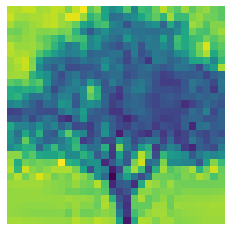

In [46]:
classical_img = Image.open("image/tree_part1.jpg")
classical_img = ImageOps.grayscale(classical_img)
classical_arr = np.asarray(classical_img)
plt.imshow(classical_arr)
plt.axis('off')
plt.show()

In [2]:
## Check if this function is applicable to regular compress sensing
classical_img = Image.open("image/tree_part1.jpg")
classical_img = ImageOps.grayscale(classical_img)
classical_arr = np.asarray(classical_img)
cn, cm = classical_arr.shape
print(cn, cm)
classical_samp_list = [100, 200, 500] #np.floor (cn * cm * 0.20).astype(int)


NameError: name 'Image' is not defined

sample at:  100


/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.2945391888953, tolerance: 30.683804
  model = cd_fast.enet_coordinate_descent(


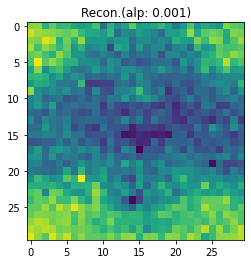

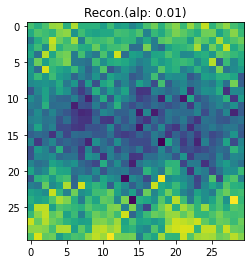

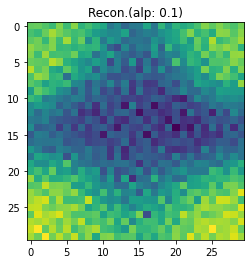

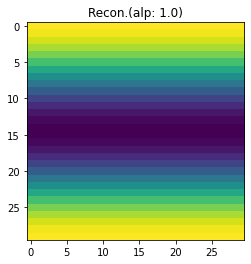

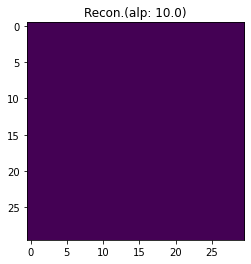

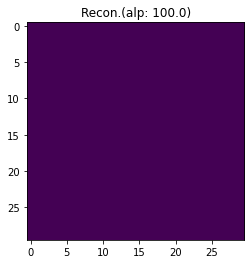

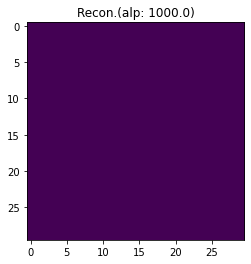

sample at:  200


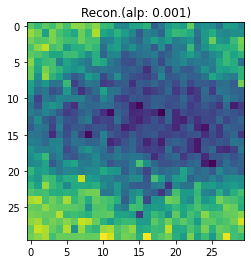

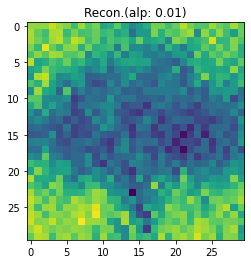

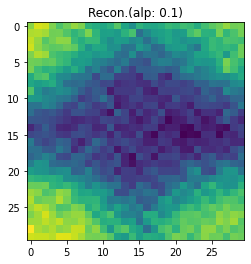

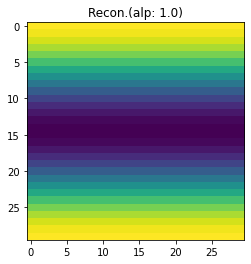

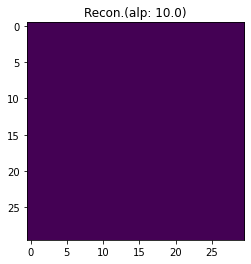

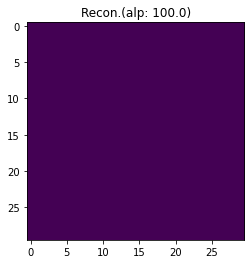

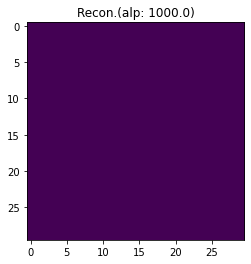

sample at:  500


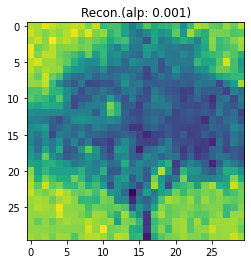

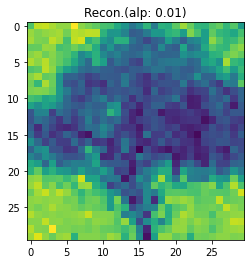

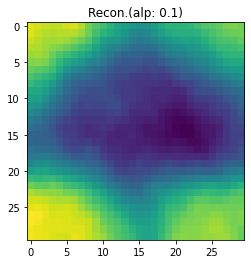

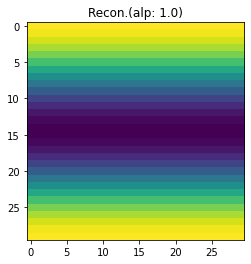

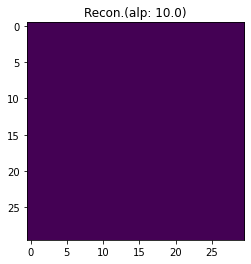

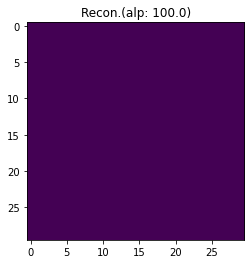

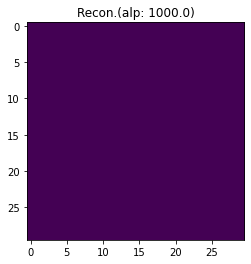

In [7]:
alpha_list = np.logspace(-3, 3, 7)

for classical_samp in classical_samp_list:
    print('sample at: ', classical_samp)
    for alp in alpha_list:
        # Generate random indexes and find corresponding y value for each index
        rand_index = np.random.permutation(cn * cm)[:classical_samp]
        classical_Y = classical_arr.flatten()[rand_index]
        classical_Y = classical_Y.reshape(classical_samp, 1)

        # Generate C matrix
        C = np.eye(cn * cm)[rand_index, :]# * np.sqrt(cn * cm)
        C3D = C.reshape(classical_samp, cn, cm)
        theta, classical_reform, s = compress(C3D, classical_Y, alp)

        plt.imshow(classical_reform)
        plt.title("Recon.(alp: " + str(alp) + ")")
        plt.show()

In [27]:
rand_index = np.random.permutation(cn * cm)[:500]
classical_Y = classical_arr.flatten()[rand_index]
classical_Y = classical_Y.reshape(500, 1)

# Generate C matrix
C = np.eye(cn * cm)[rand_index, :] * np.sqrt(cn * cm)
C3D = C.reshape(500, cn, cm)
theta, classical_reform, s = compress(C3D, classical_Y, 0.03)



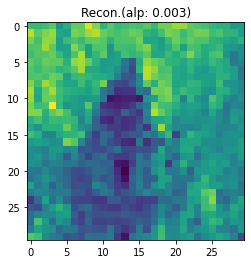

In [28]:
plt.imshow(classical_reform)
plt.title("Recon.(alp: 0.003)")
plt.show()

In [29]:
classical_arr

array([[173, 172, 176, 185, 180, 164, 193, 189, 226, 189, 181, 186, 181,
        185, 179, 178, 187, 191, 193, 194, 188, 190, 188, 184, 179, 171,
        172, 168, 145, 154],
       [169, 182, 198, 191, 161, 154, 196, 191, 206, 185, 178, 184, 180,
        188, 192, 189, 168, 162, 178, 197, 190, 187, 186, 194, 193, 176,
        181, 157, 169, 170],
       [170, 177, 204, 188, 150, 150, 198, 211, 188, 188, 184, 171, 180,
        190, 182, 170, 157, 157, 152, 174, 193, 189, 189, 181, 180, 175,
        164, 159, 154, 169],
       [175, 183, 208, 188, 153, 154, 201, 216, 187, 181, 183, 145, 177,
        191, 171, 188, 179, 163, 152, 175, 183, 175, 165, 163, 162, 175,
        174, 151, 138, 148],
       [175, 184, 207, 191, 153, 156, 203, 211, 183, 171, 154, 146, 155,
        179, 171, 218, 196, 189, 172, 175, 163, 161, 165, 166, 162, 179,
        183, 137, 120, 116],
       [187, 179, 191, 187, 155, 161, 204, 210, 190, 166, 149, 152, 156,
        140,  96, 200, 203, 191, 184, 170, 159, 161,

In [30]:
classical_reform * np.sqrt(cn * cm)

array([[ 3.18232648e+01,  3.06041166e+01,  3.46148679e+01,
         4.34576691e+01,  4.74786980e+00,  2.29414543e+01,
         4.81830929e+01,  4.72183899e+01,  8.38277694e+01,
         5.76402873e+01,  2.80041908e+01,  4.38633672e+01,
         3.28601099e+01,  3.54015892e+01,  3.92622287e+01,
         3.62496493e+01,  4.46484225e+01,  3.16009449e+01,
         5.11539039e+01,  5.19929034e+01,  6.30534023e+01,
         6.29965499e+01,  4.62781618e+01,  4.12099674e+01,
         3.71007715e+01,  2.92501106e+01,  2.46205321e+01,
         2.60478789e+01,  8.12301890e+00,  1.20925948e+01],
       [ 7.28163105e+01,  4.48036910e+01,  5.58209023e+01,
         6.36954388e+01,  1.92424296e+01,  1.26026285e+01,
         5.45538181e+01,  4.92017483e+01,  6.43406000e+01,
         7.10877539e+01,  4.85225241e+01,  4.20095129e+01,
         3.80084163e+01,  4.20367672e+01,  5.02666764e+01,
         4.68434488e+01,  2.69094393e+01,  2.04417144e+01,
         3.66056761e+01,  5.51829752e+01,  4.84971575e+

In [21]:
error = np.linalg.norm(classical_arr - classical_reform, 'fro') / np.sqrt(cm*cn)
error

136.37381994675107